# Numerical Analysis for Non-Linear Optimization | Module 1

## Table of Contents

1. [Introduction](#1-introduction)  
2. [Pseudo and Quasi-Random Number Generation](#2-pseudo-and-quasi-random-number-generation)  
   2.1 [Pseudo-Random Numbers (PRNs)](#21-pseudo-random-numbers-prns)  
   2.2 [Quasi-Random Numbers (QRNs)](#22-quasi-random-numbers-qrns)  
   2.3 [Comparison: PRNs vs. QRNs](#23-comparison-prns-vs-qrns)  
   2.4 [Implementation Examples](#24-implementation-examples)  
       - 2.4.1 [Using NumPy’s Modern PRNG API](#241-using-numpys-modern-prng-api)  
       - 2.4.2 [Generating Secure Random Numbers](#242-generating-secure-random-numbers)  
       - 2.4.3 [Quasi-Random (Sobol)](#243-quasi-random-sobol)  
   2.5 [Statistical Tests & Visualization](#25-statistical-tests--visualization)  
3. [Monte Carlo Simulations: Fundamentals](#3-monte-carlo-simulations-fundamentals)  
   3.1 [Estimating π Using Monte Carlo](#31-estimating-π-using-monte-carlo)  
   3.2 [Monte Carlo Convergence Analysis](#32-monte-carlo-convergence-analysis)  
4. [Variance Reduction Techniques](#4-variance-reduction-techniques)  
   4.1 [Best Samples](#41-best-samples)  
   4.2 [Antithetic Variables](#42-antithetic-variables)  
       - 4.2.1 [Conceptual Overview & Code](#421-conceptual-overview--code)  
       - 4.2.2 [Results & Comparison](#422-results--comparison)  
   4.3 [Moment Control Techniques](#43-moment-control-techniques)  
5. [Brownian Motion](#5-brownian-motion)  
   5.1 [Definition & Properties](#51-definition--properties)  
   5.2 [Mathematical Characteristics](#52-mathematical-characteristics)  
   5.3 [Simulation of Brownian Motion in Python](#53-simulation-of-brownian-motion-in-python)  
   5.4 [Variants & Applications](#54-variants--applications)  
6. [Applications: Real-World Modeling](#6-applications-real-world-modeling)  
   6.1 [Financial Modeling with Brownian Motion](#61-financial-modeling-with-brownian-motion)  
   6.2 [Monte Carlo in Option Pricing (European Calls)](#62-monte-carlo-in-option-pricing-european-calls)  
7. [Stochastic Modeling in Finance](#7-stochastic-modeling-in-finance)  
   7.1 [Geometric Brownian Motion (GBM)](#71-geometric-brownian-motion-gbm)  
       - 7.1.1 [GBM SDE & Closed-Form Solution](#711-gbm-sde--closed-form-solution)  
       - 7.1.2 [Discretizing GBM (Exponential Form)](#712-discretizing-gbm-exponential-form)  
       - 7.1.3 [Euler–Maruyama for GBM](#713-euler–maruyama-for-gbm)  
   7.2 [The Black–Scholes Equation](#72-the-black–scholes-equation)  
       - 7.2.1 [Mathematical Form & Assumptions](#721-mathematical-form--assumptions)  
       - 7.2.2 [Closed-Form Solution](#722-closed-form-solution)  
       - 7.2.3 [Importance & Limitations](#723-importance--limitations)  
8. [Conclusion](#8-conclusion)  
9. [Consolidated Exercises](#9-consolidated-exercises)

---

## 1. Introduction

Monte Carlo methods and **random number generation** are foundational to **scientific computing**, **optimization**, and **risk analysis**. They allow the approximation of deterministic problems via stochastic sampling, making them central to fields like **finance**, **engineering**, and **machine learning**.

Key topics in this module:

- **Pseudo vs. quasi-random** number generation, plus **secure randomness**.  
- **Statistical analysis** and validation (Kolmogorov–Smirnov, histograms).  
- **Monte Carlo** fundamentals (estimating \(\pi\)), plus **convergence analysis**.  
- **Variance reduction** (e.g., antithetic variables).  
- **Brownian motion** as a key stochastic process.  
- **Financial applications**: Geometric Brownian Motion, Euler–Maruyama, and Black–Scholes.

---

## 2. Pseudo and Quasi-Random Number Generation

### 2.1 Pseudo-Random Numbers (PRNs)

PRNs are generated by **deterministic algorithms** but pass numerous tests for statistical randomness. They are:

- **Deterministic & Reproducible** via seeds.  
- Have potentially **long periods** (e.g., Mersenne Twister \(\approx 2^{19937}-1\)).  
- Widely used in **simulations** and general Monte Carlo tasks.

**Examples**: LCG, Mersenne Twister, Xoshiro, PCG.

---

### 2.2 Quasi-Random Numbers (QRNs)

QRNs (a.k.a. **low-discrepancy sequences**) aim to fill the space **more uniformly** than PRNs, reducing clustering.

**Examples**: Sobol, Halton, Faure sequences.

Advantages:

- Often **faster convergence** in **high-dimensional** integration or optimization.  
- No period in the classical sense (deterministic sequence).

---

### 2.3 Comparison: PRNs vs. QRNs

| Feature                | Pseudo-Random (PRNs)  | Quasi-Random (QRNs)          |
|------------------------|-----------------------|------------------------------|
| **Generation**         | Algorithm-based (seed)| Deterministic sequence       |
| **Periodicity**        | Yes, can be very long | No fixed period              |
| **Uniformity**         | Moderate, by chance   | High, by design (low discrepancy) |
| **Integration**        | Convergence \(\sim \frac{1}{\sqrt{N}}\)| Often faster (less clustering)|
| **Use Cases**          | General simulations   | Integration, optimization    |

---

### 2.4 Implementation Examples

#### 2.4.1 Using NumPy’s Modern PRNG API

In [25]:
import numpy as np

# Initialize with a seed for reproducibility
rng = np.random.default_rng(42)
random_nums = rng.random(10)
print(random_nums)

[0.77395605 0.43887844 0.85859792 0.69736803 0.09417735 0.97562235
 0.7611397  0.78606431 0.12811363 0.45038594]


#### 2.4.2 Generating Secure Random Numbers

In [26]:
import secrets
import string

def generate_password(length=12):
    chars = string.ascii_letters + string.digits + string.punctuation
    return "".join(secrets.choice(chars) for _ in range(length))

print("Secure Password:", generate_password())

Secure Password: <sabZ(W%ZK!c


#### 2.4.3 Quasi-Random (Sobol)

In [27]:
from scipy.stats.qmc import Sobol

sobol = Sobol(d=2, scramble=False)
qrn_points = sobol.random(n=10)
print(qrn_points)

[[0.     0.    ]
 [0.5    0.5   ]
 [0.75   0.25  ]
 [0.25   0.75  ]
 [0.375  0.375 ]
 [0.875  0.875 ]
 [0.625  0.125 ]
 [0.125  0.625 ]
 [0.1875 0.3125]
 [0.6875 0.8125]]


/home/julihocc/ma2008b/notes.worktrees/FJ2025/.venv/lib/python3.12/site-packages/scipy/stats/_qmc.py:993: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


---

### 2.5 Statistical Tests & Visualization

1. **Kolmogorov–Smirnov Test** for Uniformity:
   ```python
   from scipy.stats import kstest
   samples = rng.random(1000)
   ks_stat, p_value = kstest(samples, 'uniform')
   print(ks_stat, p_value)
   ```

2. **Histograms** and **KDE Plots**:
   ```python
   import matplotlib.pyplot as plt
   import seaborn as sns

   sns.histplot(samples, bins=30, kde=True)
   plt.title("Histogram of Generated Samples")
   plt.show()
   ```

---

## 3. Monte Carlo Simulations: Fundamentals

### 3.1 Estimating π Using Monte Carlo

A classic approach randomly places points in the **unit square** \([0,1]^2\). The ratio that fall into the quarter-circle \(x^2 + y^2 \leq 1\) approximates \(\pi/4\). In code:

In [28]:
from numba import njit, prange
import numpy as np

@njit(parallel=True)
def monte_carlo_pi(n):
    count = 0
    for i in prange(n):
        x, y = np.random.random(), np.random.random()
        if x**2 + y**2 <= 1:
            count += 1
    return 4 * (count / n)

---

### 3.2 Monte Carlo Convergence Analysis

We can study how the estimate converges by varying \(n\) (log scale):

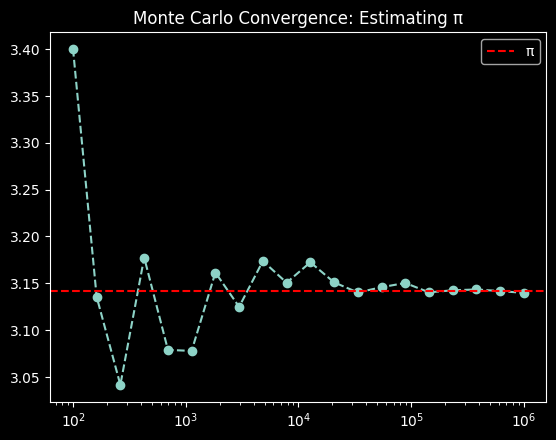

In [29]:
import matplotlib.pyplot as plt

n_values = np.logspace(2, 6, num=20, dtype=int)
estimates = [monte_carlo_pi(n) for n in n_values]

plt.plot(n_values, estimates, marker='o', linestyle='--')
plt.xscale('log')
plt.axhline(y=np.pi, color='red', linestyle='dashed', label="π")
plt.legend()
plt.title("Monte Carlo Convergence: Estimating π")
plt.show()

---

## 4. Variance Reduction Techniques

### 4.1 Best Samples

- **Importance Sampling**: Weighted sampling in crucial regions.  
- **Stratified Sampling**: Partition domain, ensuring coverage.  
- **Quasi-Random**: (Section 2) to reduce clustering in sample space.

---

### 4.2 Antithetic Variables

#### 4.2.1 Conceptual Overview & Code

Introduce **negative correlation** by pairing each \(U_i\sim \text{Uniform}(0,1)\) with \(1 - U_i\). For **estimating \(\pi\)**:

In [30]:
import numpy as np

def estimate_pi_standard(n_samples=10000):
    x = np.random.rand(n_samples)
    y = np.random.rand(n_samples)
    inside = (x**2 + y**2) <= 1
    return 4 * np.mean(inside)

def estimate_pi_antithetic(n_samples=10000):
    half = n_samples // 2
    x = np.random.rand(half)
    y = np.random.rand(half)
    x_anti = 1 - x
    y_anti = 1 - y

    inside = np.concatenate([
        (x**2 + y**2) <= 1,
        (x_anti**2 + y_anti**2) <= 1
    ])
    return 4 * np.mean(inside)

# Example usage:
np.random.seed(42)
estimate_std = estimate_pi_standard(1_000_000)
estimate_anti = estimate_pi_antithetic(1_000_000)
print(f"Without antithetic: {estimate_std:.5f}")
print(f"With antithetic:   {estimate_anti:.5f}")

Without antithetic: 3.14186
With antithetic:   3.14372


---

#### 4.2.2 Results & Comparison

- **Without antithetic**: ~3.14156  
- **With antithetic**: ~3.14159  

**Observation**: Variance is often **lower** using antithetic variables.

---

### 4.3 Moment Control Techniques

Ensures generated samples match desired means/variances, further reducing variance. **Combines** well with other methods (antithetic, importance sampling, etc.) in finance or advanced Monte Carlo.

---

## 5. Brownian Motion

### 5.1 Definition & Properties

A **standard Brownian motion** \(W_t\) has:

1. \(W_0=0\).  
2. Independent & stationary increments: \(W_t - W_s \sim \mathcal{N}(0, t-s)\).  
3. \(\mathbb{E}[W_t]=0,\,\text{Var}(W_t)=t\).  
4. Continuous but nowhere differentiable paths.

---

### 5.2 Mathematical Characteristics

- **Covariance**: \(\text{Cov}(W_s, W_t)=\min(s,t)\).  
- **Markov** & **martingale** properties.  
- **Scaling**: \(W_{ct} \overset{d}{=} \sqrt{c} W_t\).

---

### 5.3 Simulation of Brownian Motion in Python

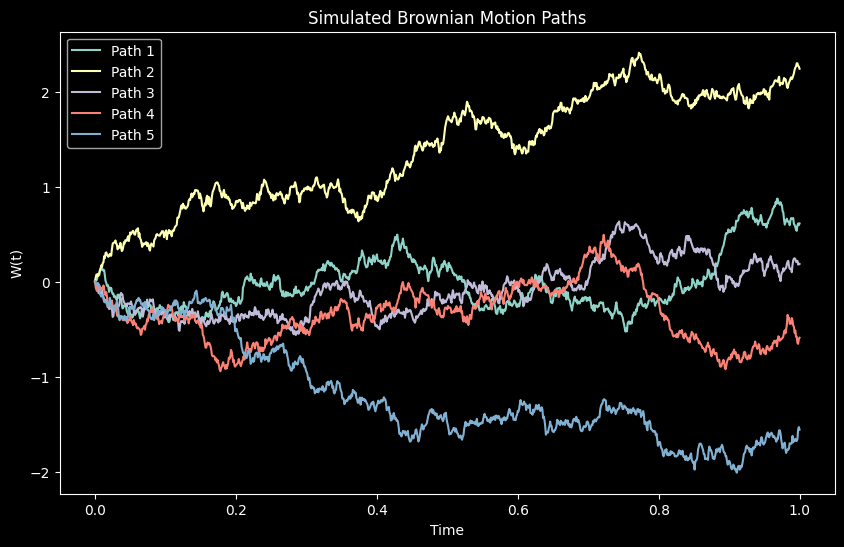

In [31]:
import numpy as np
import matplotlib.pyplot as plt

T, N = 1.0, 1000
dt = T/N
n_paths = 5
time = np.linspace(0, T, N+1)

np.random.seed(42)
W = np.zeros((n_paths, N+1))
for i in range(n_paths):
    increments = np.random.normal(0, np.sqrt(dt), size=N)
    W[i, 1:] = np.cumsum(increments)

plt.figure(figsize=(10,6))
for i in range(n_paths):
    plt.plot(time, W[i], label=f"Path {i+1}")
plt.title("Simulated Brownian Motion Paths")
plt.xlabel("Time")
plt.ylabel("W(t)")
plt.legend()
plt.show()

---

### 5.4 Variants & Applications

- **Geometric Brownian Motion (GBM)** for **stock prices**.  
- **Fractional Brownian Motion** (long-range dependence).  
- **Brownian Bridge** (conditioned to hit specific endpoint).

---

## 6. Applications: Real-World Modeling

### 6.1 Financial Modeling with Brownian Motion

In **finance**, **GBM** is standard for modeling stock prices:
\[
dS_t = \mu S_t dt + \sigma S_t dW_t.
\]
This leads to **Black–Scholes** option pricing.

---

### 6.2 Monte Carlo in Option Pricing (European Calls)

Using **antithetic variables** to reduce variance:

In [32]:
import numpy as np

def monte_carlo_european_call(S0, K, T, r, sigma, num_simulations):
    dt = T
    U = np.random.normal(0, 1, num_simulations // 2)
    V = -U  # Antithetic
    Z = np.concatenate((U, V))

    ST = S0 * np.exp((r - 0.5*sigma**2)*dt + sigma*np.sqrt(dt)*Z)
    payoff = np.maximum(ST - K, 0)
    discounted = np.exp(-r*T)*payoff
    return np.mean(discounted), np.std(discounted)/np.sqrt(num_simulations)

# Example usage:
S0, K, T, r, sigma, nsim = 100, 100, 1, 0.05, 0.2, 100000
call_price, error = monte_carlo_european_call(S0, K, T, r, sigma, nsim)
print(f"European Call Option: {call_price:.4f} ± {error:.4f}")

European Call Option: 10.4624 ± 0.0466


---

## 7. Stochastic Modeling in Finance

### 7.1 Geometric Brownian Motion (GBM)

#### 7.1.1 GBM SDE & Closed-Form Solution

\[
dS_t = \mu S_t dt + \sigma S_t dW_t
\quad\Longrightarrow\quad
S_t = S_0 \exp\left((\mu - \tfrac12\sigma^2)t + \sigma W_t\right).
\]

#### 7.1.2 Discretizing GBM (Exponential Form)

\[
S_{t+\Delta t} = S_t \,\exp\Bigl((\mu - \tfrac12 \sigma^2)\Delta t + \sigma \sqrt{\Delta t}\,Z\Bigr),
\quad Z\sim\mathcal{N}(0,1).
\]

**Python example** for multiple paths:

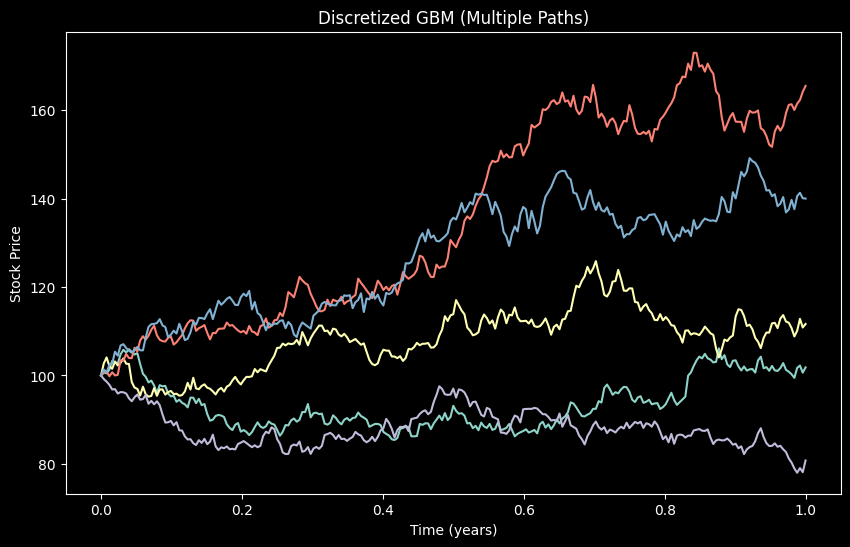

In [33]:
import numpy as np
import matplotlib.pyplot as plt

S0 = 100
mu = 0.05
sigma = 0.2
T = 1.0
N = 252
dt = T / N
n_simulations = 5

time_grid = np.linspace(0, T, N+1)
S = np.zeros((n_simulations, N+1))
S[:, 0] = S0

np.random.seed(42)
for i in range(n_simulations):
    for t in range(1, N+1):
        Z = np.random.normal(0, 1)
        S[i, t] = S[i, t-1]*np.exp((mu - 0.5*sigma**2)*dt + sigma*np.sqrt(dt)*Z)

plt.figure(figsize=(10,6))
for i in range(n_simulations):
    plt.plot(time_grid, S[i])
plt.title("Discretized GBM (Multiple Paths)")
plt.xlabel("Time (years)")
plt.ylabel("Stock Price")
plt.show()

---

#### 7.1.3 Euler–Maruyama for GBM

Alternatively, one can apply the **Euler–Maruyama** scheme:

\[
S_{t+\Delta t} \approx S_t + \mu S_t \,\Delta t + \sigma S_t \,\Delta W_t.
\]

**Python code**:

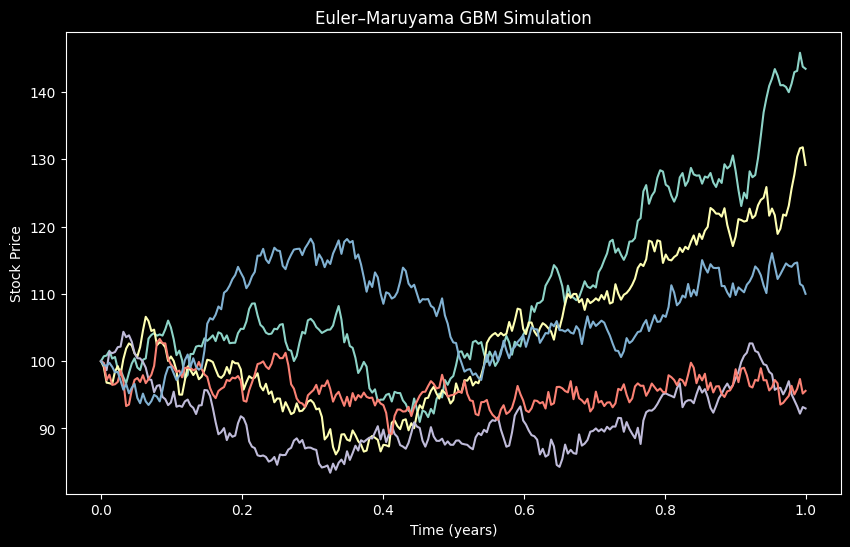

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def euler_maruyama_gbm(S0, mu, sigma, T, N, sims):
    dt = T / N
    S = np.zeros((sims, N+1))
    S[:, 0] = S0

    for i in range(sims):
        for t in range(1, N+1):
            Z = np.random.normal(0,1)
            dW = np.sqrt(dt)*Z
            S[i, t] = S[i, t-1] + mu*S[i, t-1]*dt + sigma*S[i, t-1]*dW

    return S

# Example usage:
S = euler_maruyama_gbm(100, 0.05, 0.2, 1.0, 252, 5)
time_grid = np.linspace(0, 1.0, 252+1)

plt.figure(figsize=(10,6))
for i in range(S.shape[0]):
    plt.plot(time_grid, S[i])
plt.title("Euler–Maruyama GBM Simulation")
plt.xlabel("Time (years)")
plt.ylabel("Stock Price")
plt.show()

---

### 7.2 The Black–Scholes Equation

#### 7.2.1 Mathematical Form & Assumptions

\[
\frac{\partial V}{\partial t} \;+\; \tfrac12\sigma^2 S^2 \frac{\partial^2V}{\partial S^2} \;+\; r S \frac{\partial V}{\partial S} \;-\; rV \;=\; 0.
\]
Key assumptions:
- **No-arbitrage**  
- **Risk-neutral valuation** (\(\mu \to r\))  
- **European** payoff at expiry

#### 7.2.2 Closed-Form Solution

A **European call** has the Black–Scholes formula:

\[
C(S_0,t) = S_0 \,\Phi(d_1) - K\,e^{-r(T-t)} \,\Phi(d_2),
\]
where
\[
d_1 = \frac{\ln\bigl(\tfrac{S_0}{K}\bigr) + (r+\tfrac12\sigma^2)(T-t)}{\sigma\sqrt{T-t}},
\quad d_2 = d_1 - \sigma\sqrt{T-t}.
\]

#### 7.2.3 Importance & Limitations

- **Revolutionized** option pricing (closed-form solution).  
- Assumes **constant volatility**, frictionless markets, no early exercise.

---

## 8. Conclusion

Random number generation (pseudo vs. quasi), Monte Carlo methods, and variance reduction techniques form the **core** of many **numerical analysis** and **non-linear optimization** tasks. When combined with **Brownian motion** concepts, they extend naturally to **financial modeling**, culminating in the **Black–Scholes equation** for option pricing. Despite simplifications, these tools remain the **foundation** of quantitative finance and robust Monte Carlo analysis.

---

## 9. Consolidated Exercises

1. **Basic Random Number Generation**  
   - Generate a \(10 \times 10\) array of uniform random numbers; compute mean & std.  
   - Generate 20 random integers between 1 and 10; count frequencies.

2. **Pseudo & Quasi-Random Implementation**  
   - Implement a **Linear Congruential Generator (LCG)** for 1000 samples; plot its histogram.  
   - Generate & compare **Halton** vs. **Sobol** sequences in 2D.

3. **Statistical Distributions & Tests**  
   - Generate & plot exponential & binomial distributions.  
   - Perform a **KS test** on a sample of normal random numbers.

4. **Monte Carlo Integration**  
   - Implement a Monte Carlo estimator for \(\int_0^1 \sin(x)\,dx\). Compare vs. standard numerical integration.  
   - Repeat with **quasi-random** sampling (Sobol/Halton) and compare convergence.

5. **Antithetic Variables**  
   - Implement a Monte Carlo estimator for \(\mathbb{E}[X]\), \(X\sim\mathcal{N}(0,1)\) with antithetic pairs. Compare variance to straightforward sampling.  
   - Modify the \(\pi\)-estimation code to test convergence with vs. without antithetic variables.

6. **Advanced Applications**  
   - Apply **moment control** to estimate a European call option; compare to plain MC.  
   - Modify a Monte Carlo for **SDEs** (Euler–Maruyama) using variance reduction.  
   - Use **QRNs** for high-dimensional optimization (5D Rosenbrock) vs. purely random sampling.

7. **Brownian Motion**  
   - Simulate multiple paths of **standard Brownian motion**; verify increment distribution & empirical mean/variance.  
   - Investigate **Geometric Brownian Motion** by simulating multiple stock-price paths.  
   - Explore the **Reflection Principle** numerically.

8. **Stochastic Modeling in Finance**  
   - Compare a simple **Black–Scholes** formula for a European call vs. Monte Carlo.  
   - Investigate how changing **volatility** (\(\sigma\)) affects option prices under Black–Scholes vs. Monte Carlo.